In [1]:
install.packages("igraph", type="binary")
library(igraph)
library('igraph')
library('Matrix')
library('pracma')

package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Shijun\AppData\Local\Temp\RtmpgFzajt\downloaded_packages



Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union


Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



# Part 1 Generating Random Network

## 1.1 Create random networks using Erdos-Renyi model

In [2]:
# a)
prob<-c(0.003,0.004,0.01,0.05,0.1)

[1] "When p= 0.003"
[1] "degree distribution Mean is  0.0909090909090909"
[1] "degree distribution Variance is  0.00793569090909091"
[1] "Whether connected:b FALSE"


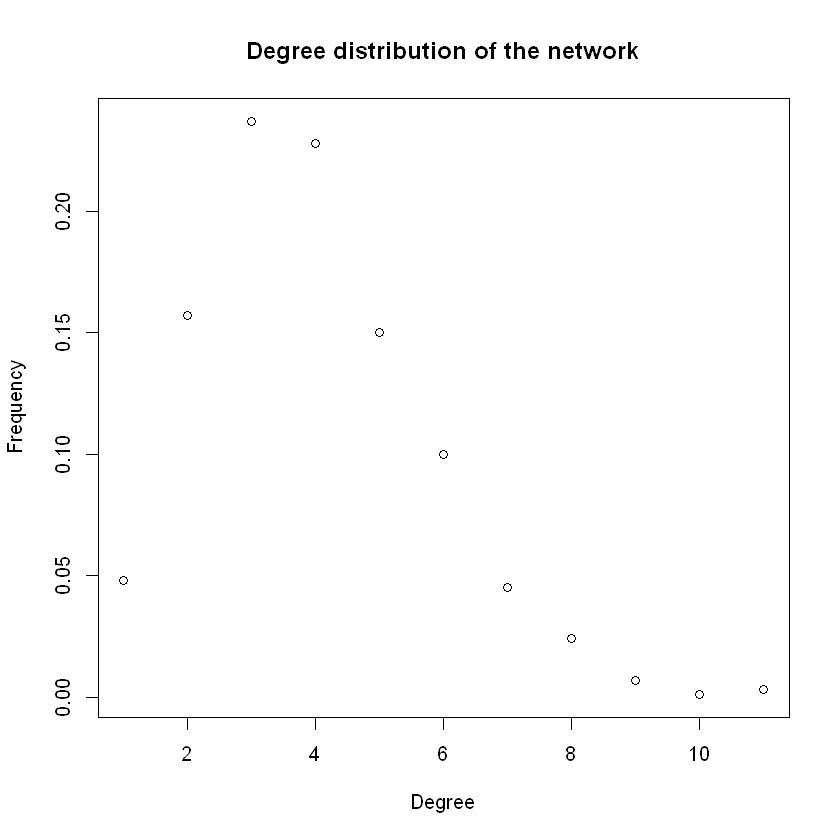

[1] "When p= 0.004"
[1] "degree distribution Mean is  0.0714285714285714"
[1] "degree distribution Variance is  0.00560718681318681"
[1] "Whether connected:b FALSE"


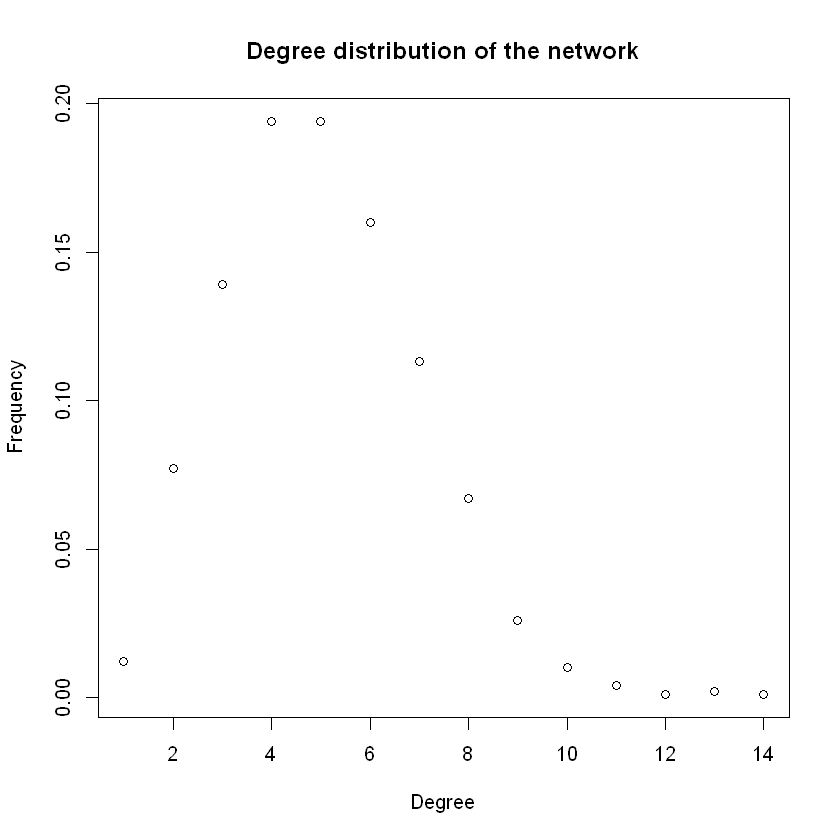

[1] "When p= 0.01"
[1] "degree distribution Mean is  0.037037037037037"
[1] "degree distribution Variance is  0.00202511396011396"
[1] "Whether connected:b TRUE"


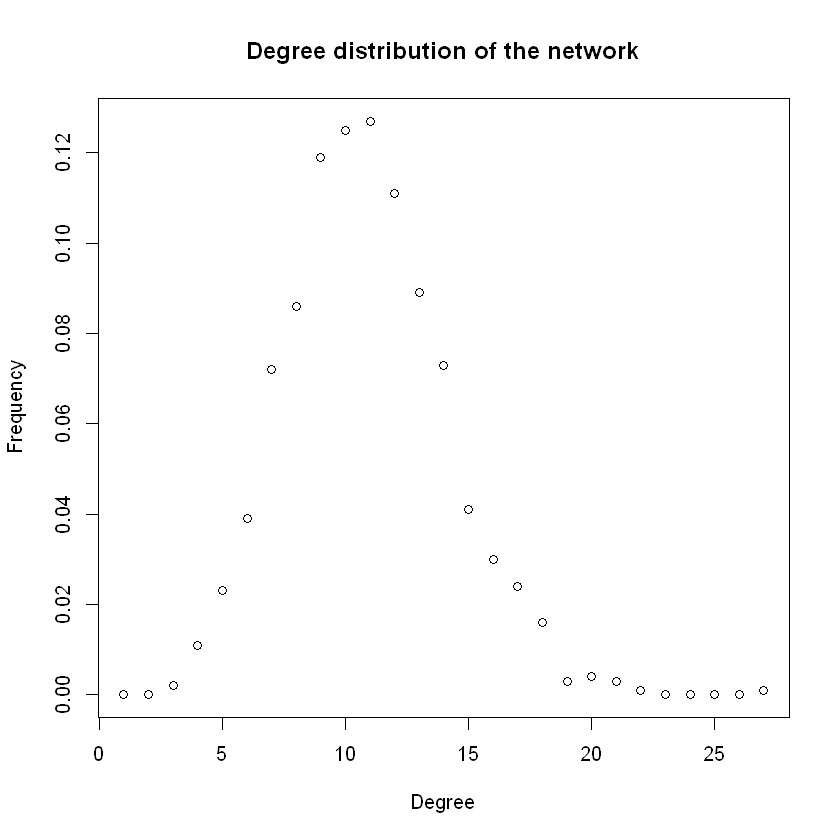

[1] "When p= 0.05"
[1] "degree distribution Mean is  0.012987012987013"
[1] "degree distribution Variance is  0.000427565618591934"
[1] "Whether connected:b TRUE"


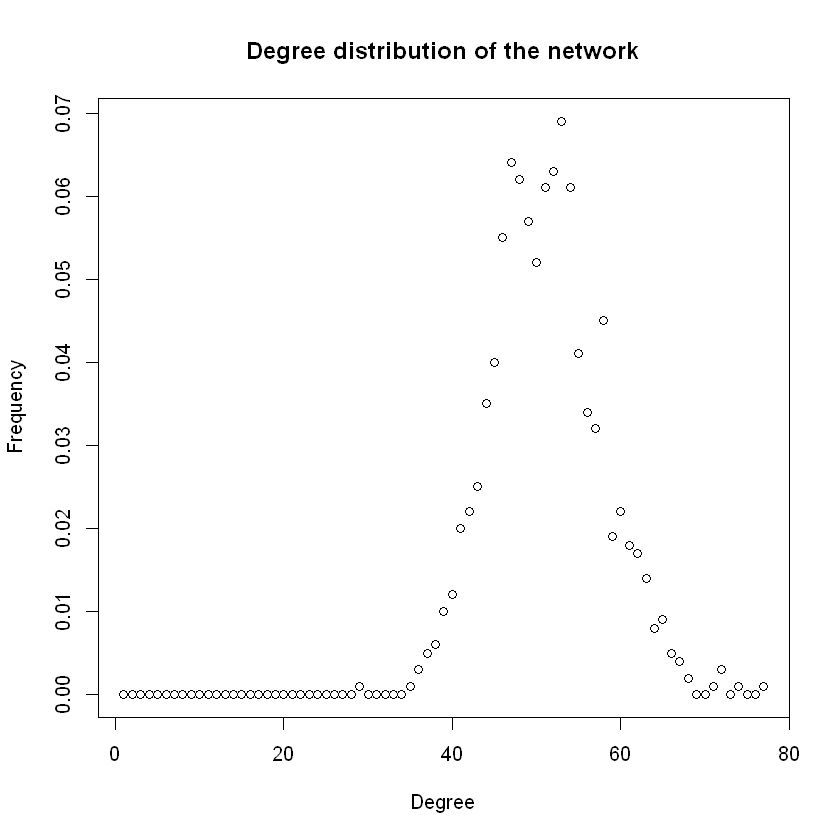

[1] "When p= 0.1"
[1] "degree distribution Mean is  0.00763358778625954"
[1] "degree distribution Variance is  0.000178941632413388"
[1] "Whether connected:b TRUE"


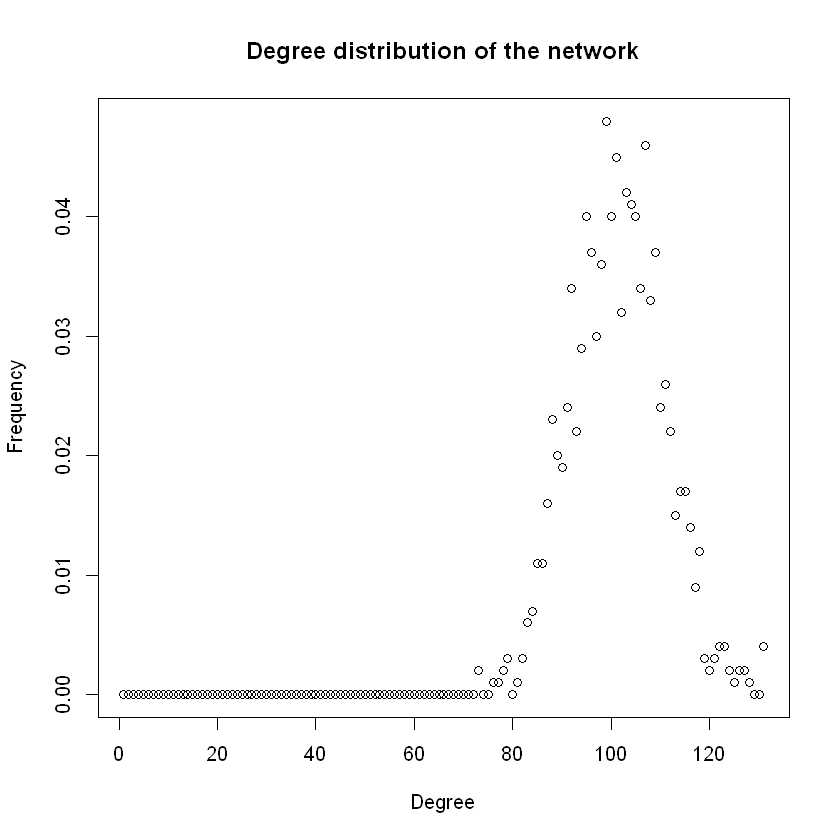

In [3]:
for (p in prob){
    g1<-erdos.renyi.game(1000,p,directed=F)
    plot(degree.distribution(g1),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
    print(paste("When p=",p))
    print(paste("degree distribution Mean is ",mean(degree.distribution(g1))))
    print(paste("degree distribution Variance is ",var(degree.distribution(g1))))
    print(paste("Whether connected:b",is.connected(g1)))
    }

As the probability increases, the the peak position of the Degree distribution of the network graph move to the right(degree increase), but the peak value decrease(top frequency decrease).

In [4]:
#b)

In [5]:
for (p in prob){
    connect<-0
    for (i in c(1:100)){
        g1<-erdos.renyi.game(1000,p,directed=F)
        connect<-connect+is.connected(g1)
        }
    print(paste("Random network with P=",p,"is",connect,"% connected"))
    }

[1] "Random network with P= 0.003 is 0 % connected"
[1] "Random network with P= 0.004 is 0 % connected"
[1] "Random network with P= 0.01 is 95 % connected"
[1] "Random network with P= 0.05 is 100 % connected"
[1] "Random network with P= 0.1 is 100 % connected"


In [6]:
print("for p=0.003")
g1 <- erdos.renyi.game(1000, 0.003, directed=F)
# Find GCC
g1.components <- clusters(g1)
print(g1.components$csize)
# which is the largest component
ix <- which.max(g1.components$csize)
# get the subgraph correspondent to just the giant component
g1.giant <- induced.subgraph(g1, which(g1.components$membership == ix))
print(paste(" Number of nodes in the GCC :",vcount(g1.giant)))
print(paste(" Number of edges in the GCC :",ecount(g1.giant)))
print(paste(" Diameter of GCC :",diameter(g1.giant)))

[1] "for p=0.003"
 [1] 931   2   1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   2   1
[20]   1   1   1   1   1   1   1   2   1   1   1   4   1   1   4   1   1   1   1
[39]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
[58]   1   1   1
[1] " Number of nodes in the GCC : 931"
[1] " Number of edges in the GCC : 1473"
[1] " Diameter of GCC : 13"


In [7]:
print("for p=0.004")
g1 <- erdos.renyi.game(1000, 0.004, directed=F)
# Find GCC
g1.components <- clusters(g1)
print(g1.components$csize)
# which is the largest component
ix <- which.max(g1.components$csize)
# get the subgraph correspondent to just the giant component
g1.giant <- induced.subgraph(g1, which(g1.components$membership == ix))
print(paste(" Number of nodes in the GCC :",vcount(g1.giant)))
print(paste(" Number of edges in the GCC :",ecount(g1.giant)))
print(paste(" Diameter of GCC :",diameter(g1.giant)))

[1] "for p=0.004"
 [1] 990   1   1   1   1   1   1   1   1   1   1
[1] " Number of nodes in the GCC : 990"
[1] " Number of edges in the GCC : 1977"
[1] " Diameter of GCC : 10"


In [8]:
#c)

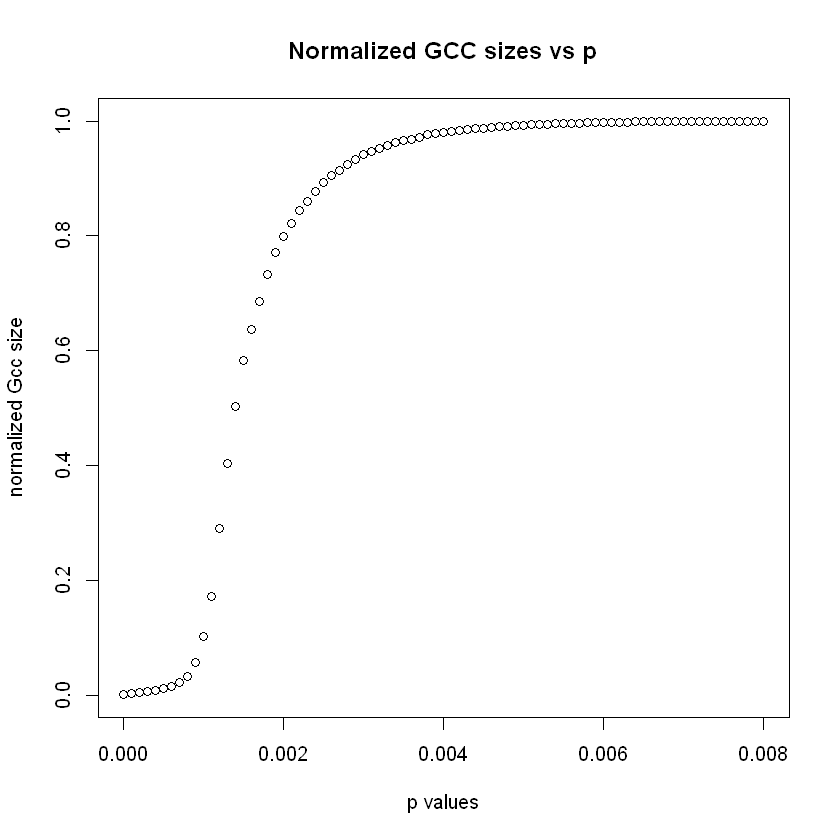

In [9]:
n=1000
Exp_normal_size<-NULL
for(p in seq(0,0.008,by=0.0001)){
    normal_GCC_size<-NULL
    for ( i in c(1:100)){
        g1 <- erdos.renyi.game(n, p, directed=F)
        g1.components <- clusters(g1)
        ix <- which.max(g1.components$csize)
        g1.giant <- induced.subgraph(g1, which(g1.components$membership == ix))
        normal_GCC_size<-c(normal_GCC_size,vcount(g1.giant)/n)
    }
    Exp_normal_size<-c(Exp_normal_size,mean(normal_GCC_size))
}
plot(seq(0,0.008,by=0.0001),Exp_normal_size,type='p',main= "Normalized GCC sizes vs p",xlab='p values',ylab='normalized Gcc size')

In [10]:
# P at about 0.001, the gaint connected component starts to emerge. P at about 0.005, the normalized GCC size converage to one

In [11]:
# d) i

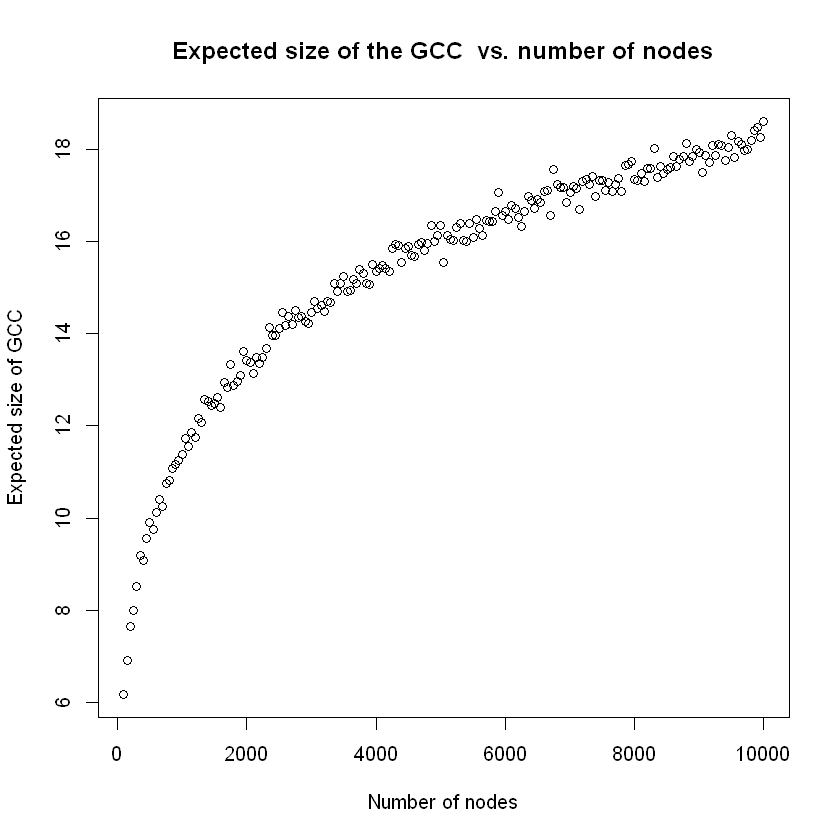

In [12]:
c<-0.5
expGCC_size<-NULL
for( n in seq(100,10000, by=50)){
    p<-c/n
    GCC_size<-NULL
    for( i in 1:500){    
    g1 <- erdos.renyi.game(n, p, directed=F)
    g1.components <- clusters(g1)
    ix <- which.max(g1.components$csize)
    g1.giant <- induced.subgraph(g1, which(g1.components$membership == ix))
    GCC_size<-c(GCC_size,vcount(g1.giant))
    }
    expGCC_size<-c(expGCC_size,mean(GCC_size))
}
plot(seq(100,10000, by=50),expGCC_size,type='p',main="Expected size of the GCC  vs. number of nodes",xlab="Number of nodes",ylab="Expected size of GCC")

In [13]:
 #ii

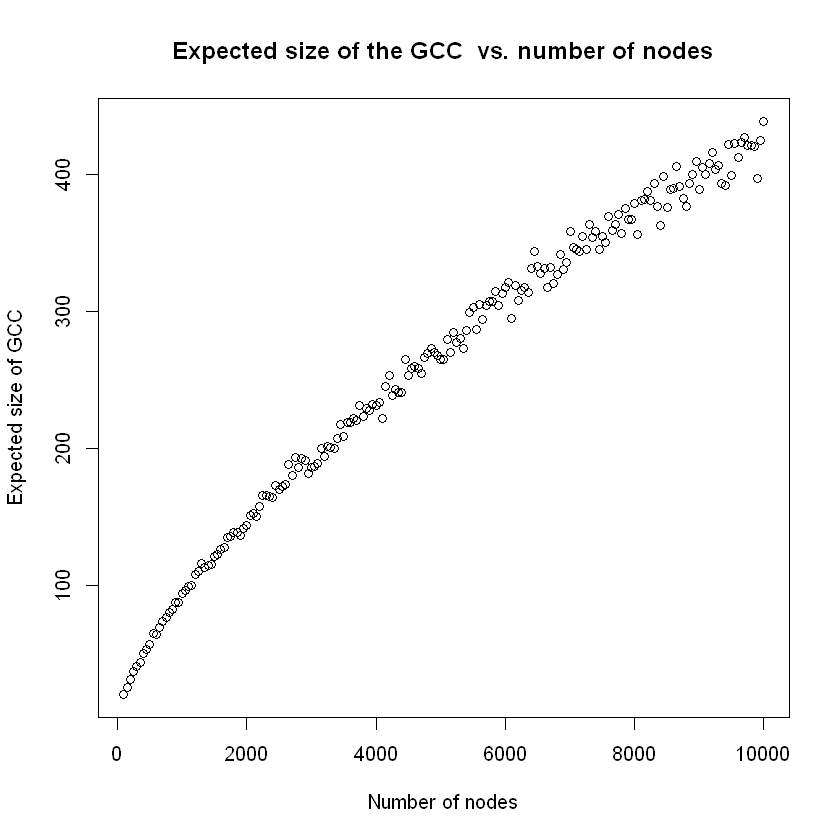

In [14]:
c<-1
expGCC_size<-NULL
for( n in seq(100,10000, by=50)){
    p<-c/n
    GCC_size<-NULL
    for( i in 1:500){    
    g1 <- erdos.renyi.game(n, p, directed=F)
    g1.components <- clusters(g1)
    ix <- which.max(g1.components$csize)
    g1.giant <- induced.subgraph(g1, which(g1.components$membership == ix))
    GCC_size<-c(GCC_size,vcount(g1.giant))
    }
    expGCC_size<-c(expGCC_size,mean(GCC_size))
}
plot(seq(100,10000, by=50),expGCC_size,type='p',main="Expected size of the GCC  vs. number of nodes",xlab="Number of nodes",ylab="Expected size of GCC")

In [15]:
#iii
xdata<-seq(100,10000, by=50)
c<-1.1
expGCC_size1<-NULL
for( n in xdata){
    p<-c/n
    GCC_size<-NULL
    for( i in 1:500){    
    g1 <- erdos.renyi.game(n, p, directed=F)
    g1.components <- clusters(g1)
    ix <- which.max(g1.components$csize)
    g1.giant <- induced.subgraph(g1, which(g1.components$membership == ix))
    GCC_size<-c(GCC_size,vcount(g1.giant))
    }
    expGCC_size1<-c(expGCC_size1,mean(GCC_size))
}

c<-1.2
expGCC_size2<-NULL
for( n in xdata){
    p<-c/n
    GCC_size<-NULL
    for( i in 1:500){    
    g1 <- erdos.renyi.game(n, p, directed=F)
    g1.components <- clusters(g1)
    ix <- which.max(g1.components$csize)
    g1.giant <- induced.subgraph(g1, which(g1.components$membership == ix))
    GCC_size<-c(GCC_size,vcount(g1.giant))
    }
    expGCC_size2<-c(expGCC_size2,mean(GCC_size))
}
c<-1.3
expGCC_size3<-NULL
for( n in xdata){
    p<-c/n
    GCC_size<-NULL
    for( i in 1:500){    
    g1 <- erdos.renyi.game(n, p, directed=F)
    g1.components <- clusters(g1)
    ix <- which.max(g1.components$csize)
    g1.giant <- induced.subgraph(g1, which(g1.components$membership == ix))
    GCC_size<-c(GCC_size,vcount(g1.giant))
    }
    expGCC_size3<-c(expGCC_size3,mean(GCC_size))
}

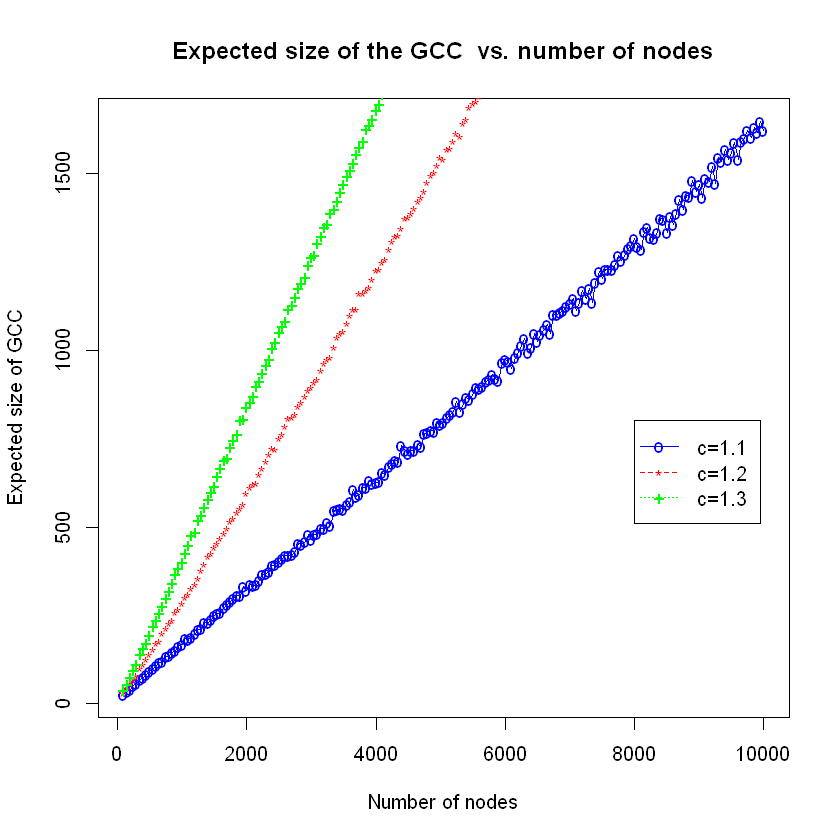

In [16]:
plot(xdata,expGCC_size1,type='o', col="blue",pch="o",main="Expected size of the GCC  vs. number of nodes",xlab="Number of nodes",ylab="Expected size of GCC")
points(xdata,expGCC_size2,col="red",pch="*")
points(xdata,expGCC_size3,col="green",pch="+")

legend(8000，800，legend=c("c=1.1","c=1.2","c=1.3"), col=c("blue","red","green"),pch=c("o","*","+"),lty=c(1,2,3), ncol=1)

In [17]:
size(expGCC_size2)
size(xdata)
size(seq(100,10000, by=50))

[1]   1 199

[1]   1 199

[1]   1 199

## 1.2 Create networks using preferential attachment model

[1] TRUE

[1] "With n=1000 nodes, modularity is 0.935677419160906"


[1] TRUE

[1] "With n=10000 nodes, modularity is 0.978119694157644"


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"6 y values <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"14 y values <= 0 omitted from logarithmic plot"

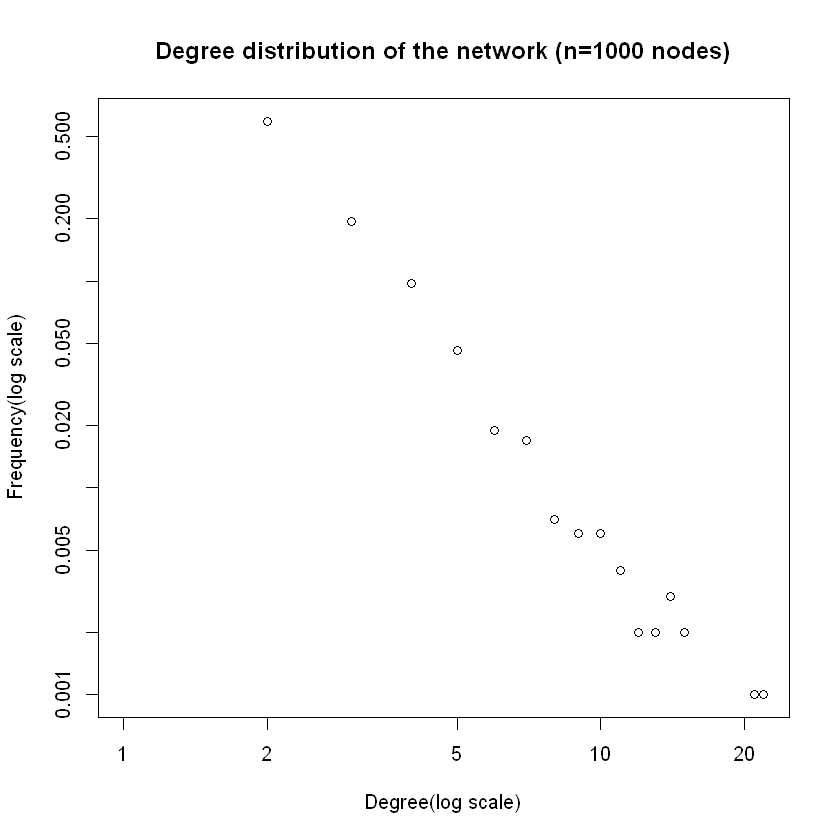

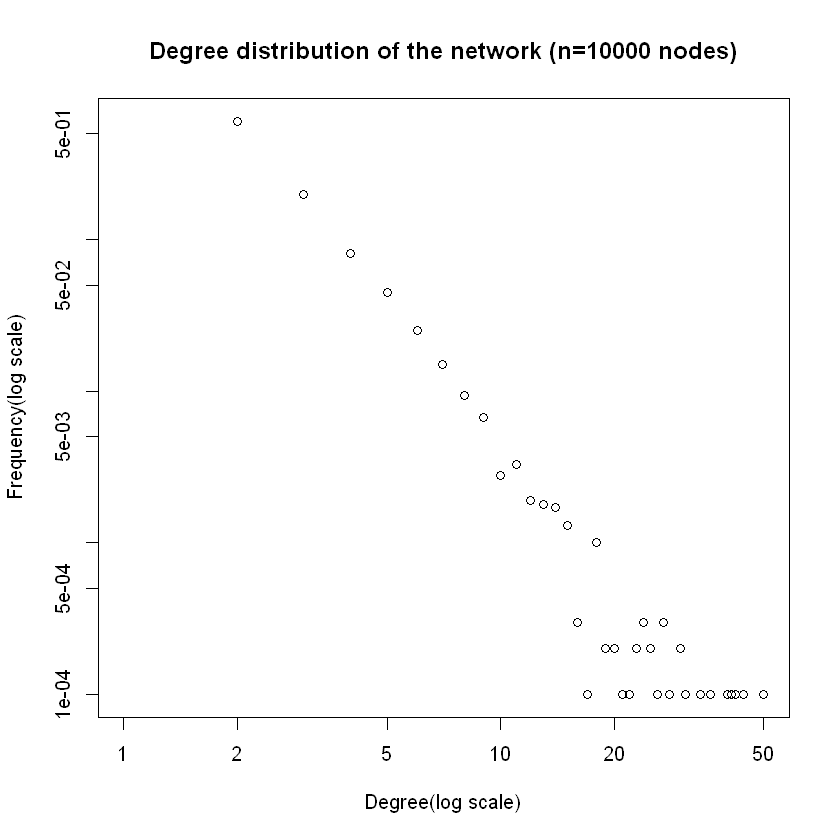

In [18]:
g1<- barabasi.game(1000,m=1, directed=F)
is.connected(g1)
fg1 <- fastgreedy.community(g1)
G_modularity1 <- modularity(fg1)
print(paste("With n=1000 nodes, modularity is",G_modularity1))

#c)
g2<- barabasi.game(10000,m=1, directed=F)
is.connected(g2)
fg2 <- fastgreedy.community(g2)
G_modularity2 <- modularity(fg2)
print(paste("With n=10000 nodes, modularity is",G_modularity2))

plot(degree.distribution(g1),main="Degree distribution of the network (n=1000 nodes)",xlab="Degree(log scale)",ylab="Frequency(log scale)",log="xy")

plot(degree.distribution(g2),main="Degree distribution of the network (n=10000 nodes)",xlab="Degree(log scale)",ylab="Frequency(log scale)",log="xy")

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"5 x values <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"125 y values <= 0 omitted from logarithmic plot"

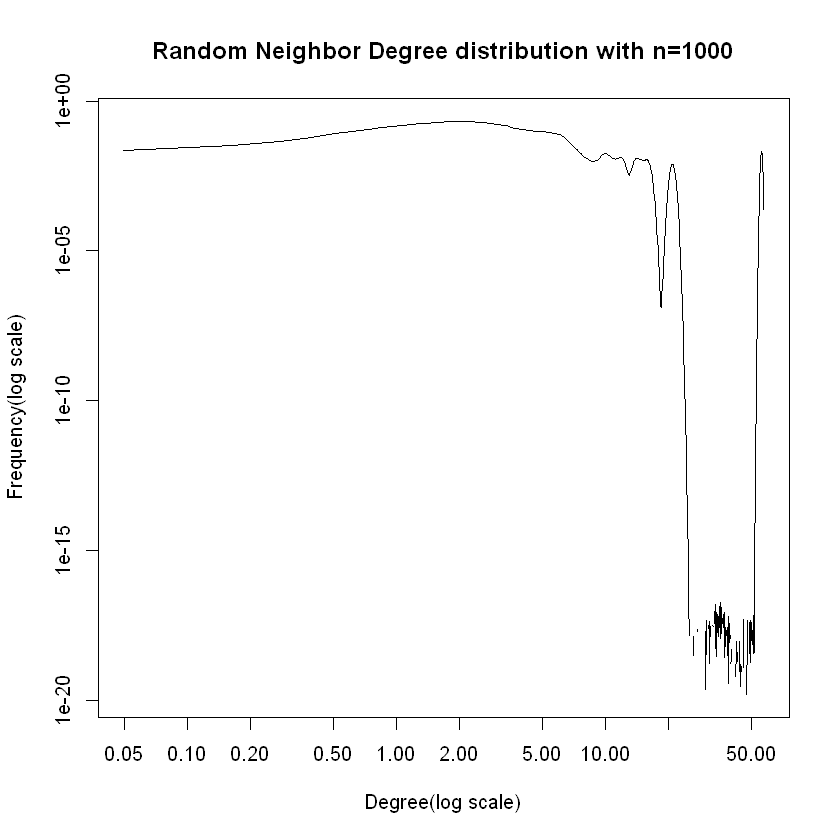

In [19]:
g<- barabasi.game(1000,m=1, directed=F)
Degree<-NULL
for (n in 1:1000){
    i<-sample(1:vcount(g),1)
    neighbor<-neighbors(g,i)
    if(length(neighbor)==1){
        j<-neighbor
    }else{
        j<-sample(neighbor,1)
    }
    Degree<-c(Degree,degree(g,j))
}

plot(density(Degree), main='Random Neighbor Degree distribution with n=1000',xlab="Degree(log scale)",ylab="Frequency(log scale)",log="xy")

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"39 y values <= 0 omitted from logarithmic plot"

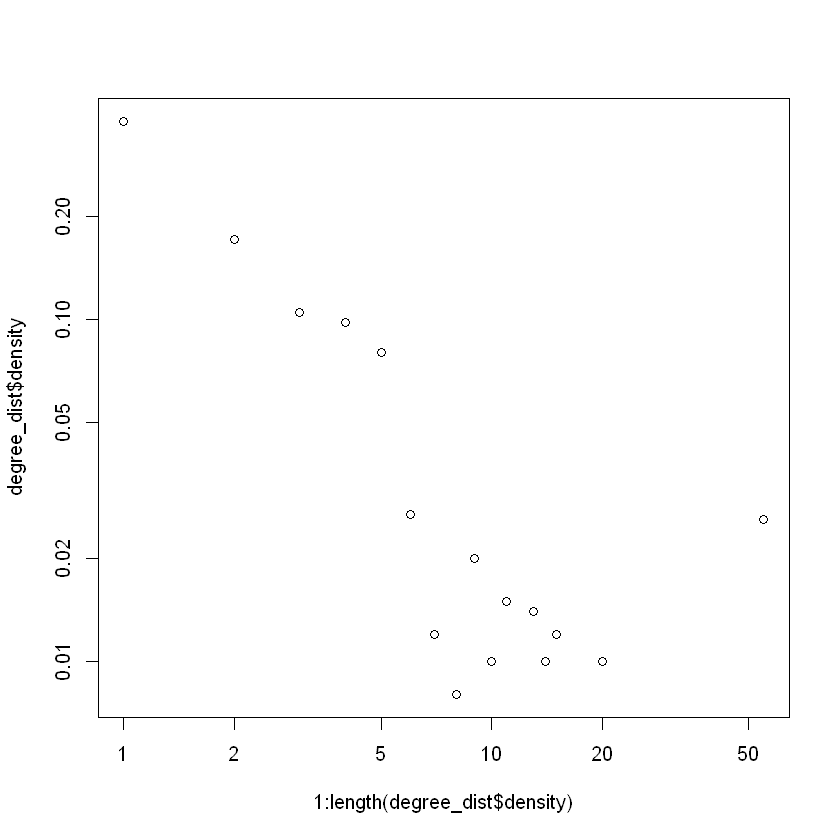

In [20]:
degree_dist<-hist(x=Degree, plot=F,breaks=seq(from=min(Degree),to=max(Degree),by=1))
plot(1:length(degree_dist$density),degree_dist$density,log="xy",type="p")

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"19 x values <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"111 y values <= 0 omitted from logarithmic plot"

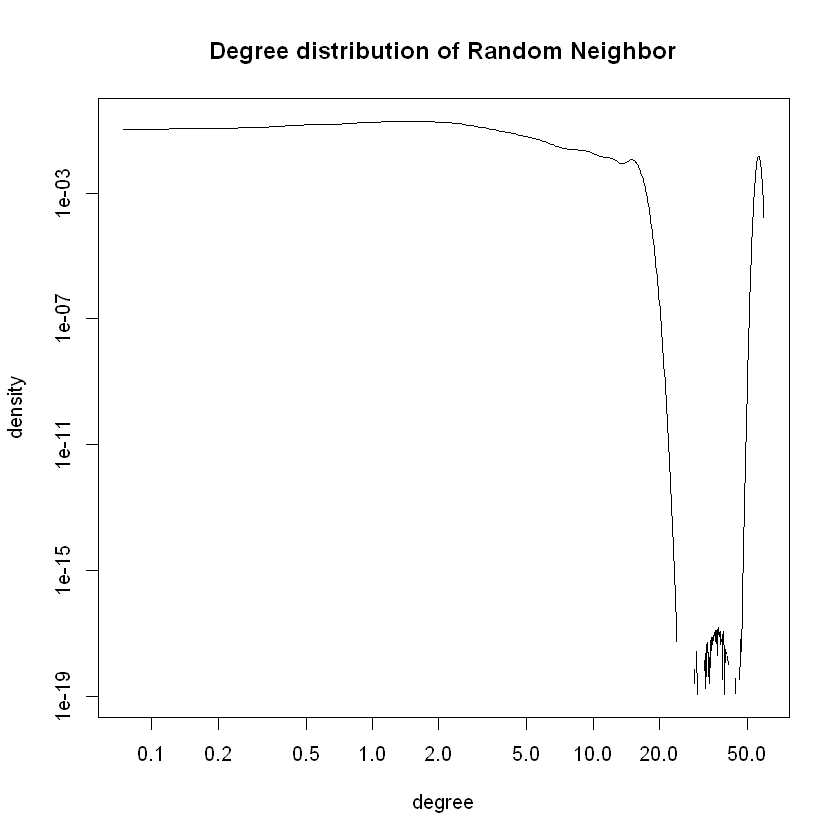

In [21]:
deg = numeric(0)
for (i in 1 : 100) {
  randNum = sample(1000, 1)
  nei = neighbors(g, V(g)[randNum], mode = 1)
  neiNode = sample(nei, 1)
  deg = c(deg, degree(g, neiNode))
}
plot(density(deg), type = "l", main='Degree distribution of Random Neighbor', xlab='degree', ylab='density',log="xy")

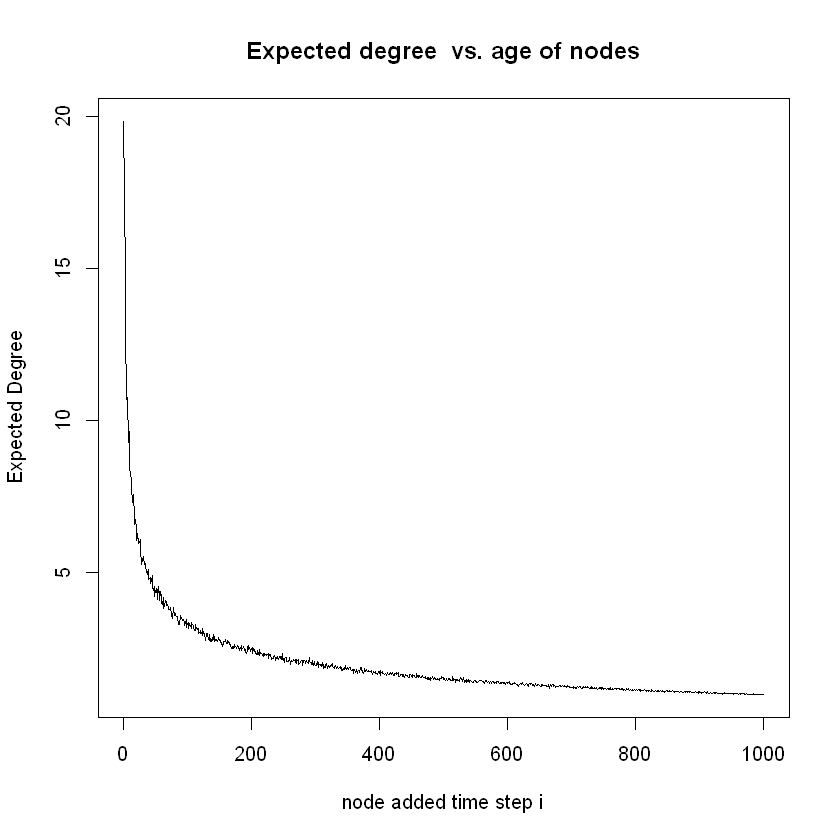

In [22]:
degreelist<-numeric(0)
for( i in 1:1000){
    degreelist[i]<-0 }
for( n in 1:500){
    g<- barabasi.game(1000,m=1, directed=F)
    for (i in 1:1000){
        degreelist[i]<-degreelist[i]+degree(g,i)}
}
F_degree<-degreelist/500

plot(seq(1,1000, 1),F_degree,type='l',main="Expected degree  vs. age of nodes",xlab="node added time step i",ylab="Expected Degree")

#g) m=2

[1] TRUE

[1] "With n=1000 nodes, modularity is 0.521095363626309"


[1] TRUE

[1] "With n=10000 nodes, modularity is 0.532076961116612"


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"29 y values <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"88 y values <= 0 omitted from logarithmic plot"

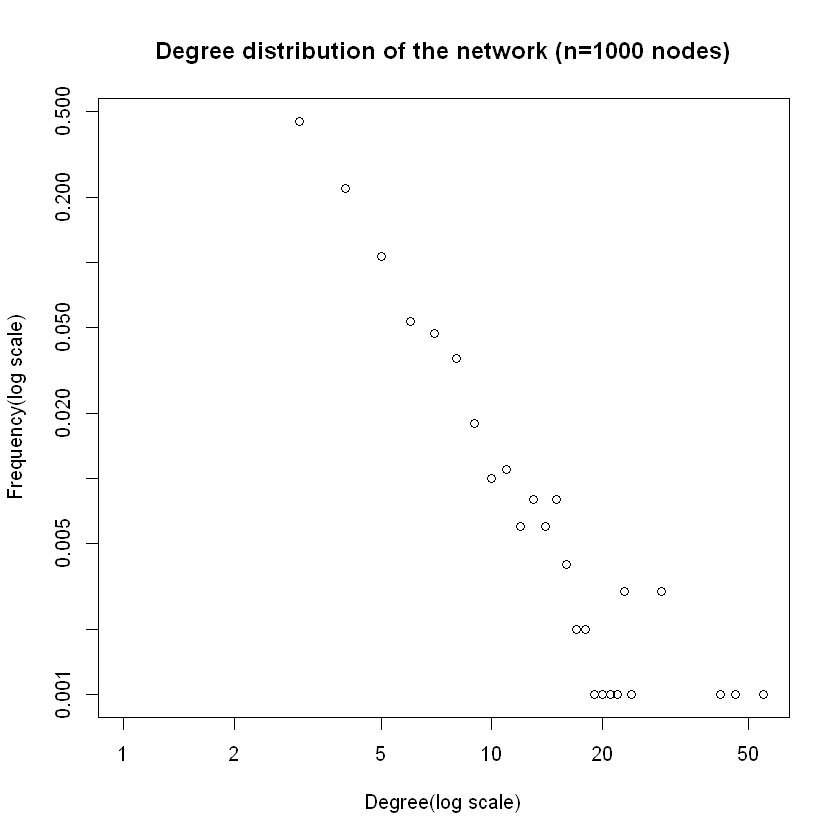

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"17 x values <= 0 omitted from logarithmic plot"

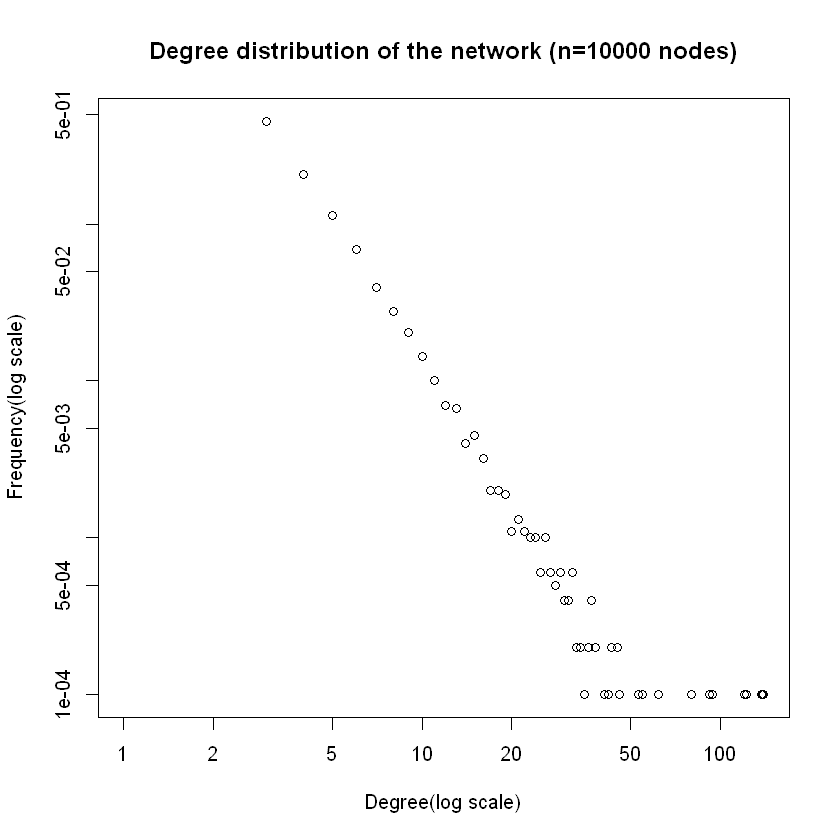

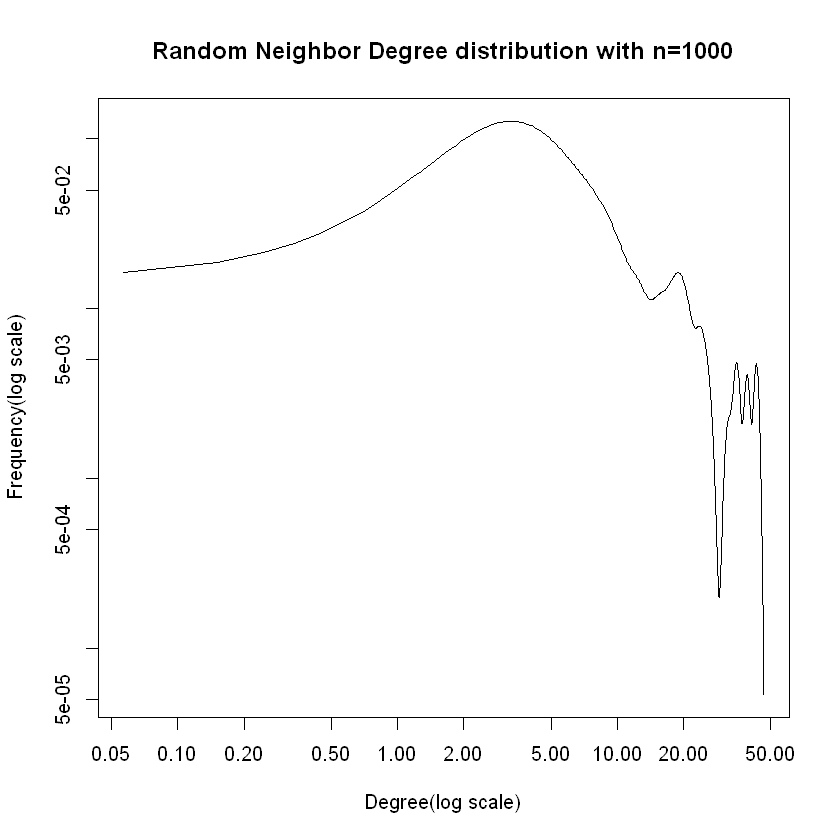

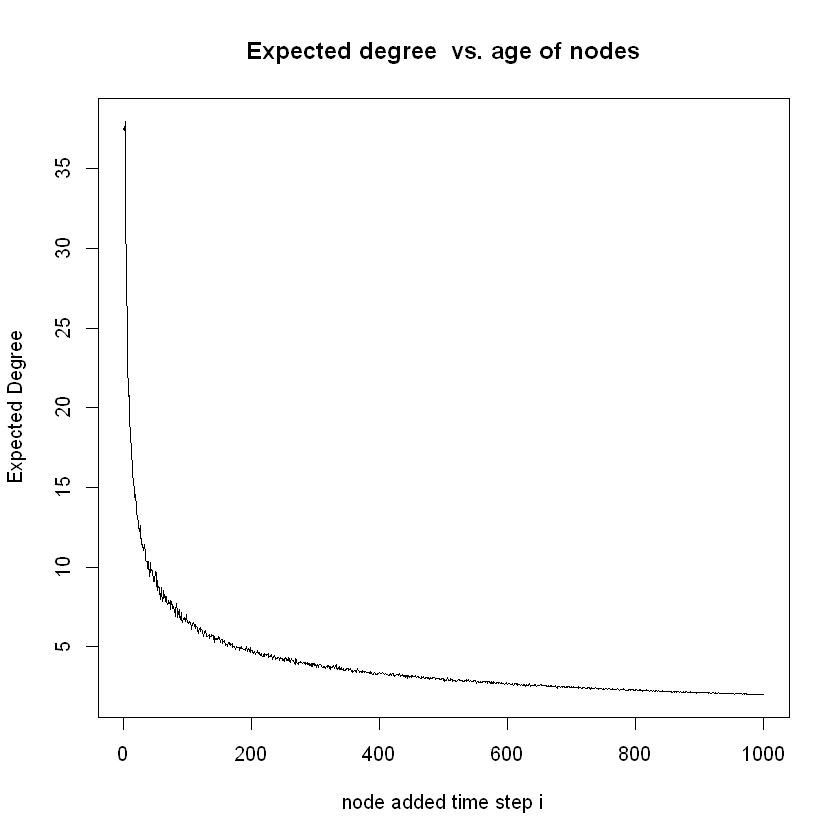

In [24]:
g1<- barabasi.game(1000,m=2, directed=F)
is.connected(g1)
fg1 <- fastgreedy.community(g1)
G_modularity1 <- modularity(fg1)
print(paste("With n=1000 nodes, modularity is",G_modularity1))

#c)
g2<- barabasi.game(10000,m=2, directed=F)
is.connected(g2)
fg2 <- fastgreedy.community(g2)
G_modularity2 <- modularity(fg2)
print(paste("With n=10000 nodes, modularity is",G_modularity2))

plot(degree.distribution(g1),main="Degree distribution of the network (n=1000 nodes)",xlab="Degree(log scale)",ylab="Frequency(log scale)",log="xy")

plot(degree.distribution(g2),main="Degree distribution of the network (n=10000 nodes)",xlab="Degree(log scale)",ylab="Frequency(log scale)",log="xy")

g<- barabasi.game(1000,m=2, directed=F)
Degree<-NULL
for (n in 1:1000){
    i<-sample(1:vcount(g),1)
    neighbor<-neighbors(g,i)
    if(length(neighbor)==1){
        j<-neighbor
    }else{
        j<-sample(neighbor,1)
    }
    Degree<-c(Degree,degree(g,j))
}

plot(density(Degree), main='Random Neighbor Degree distribution with n=1000',xlab="Degree(log scale)",ylab="Frequency(log scale)",log="xy")

degreelist<-numeric(0)
for( i in 1:1000){
    degreelist[i]<-0 }
for( n in 1:500){
    g<- barabasi.game(1000,m=2, directed=F)
    for (i in 1:1000){
        degreelist[i]<-degreelist[i]+degree(g,i)}
}
F_degree<-degreelist/500

plot(seq(1,1000, 1),F_degree,type='l',main="Expected degree  vs. age of nodes",xlab="node added time step i",ylab="Expected Degree")

[1] TRUE

[1] "With n=1000 nodes, modularity is 0.279790384191692"


[1] TRUE

[1] "With n=10000 nodes, modularity is 0.279967961779944"


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"59 y values <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"148 y values <= 0 omitted from logarithmic plot"

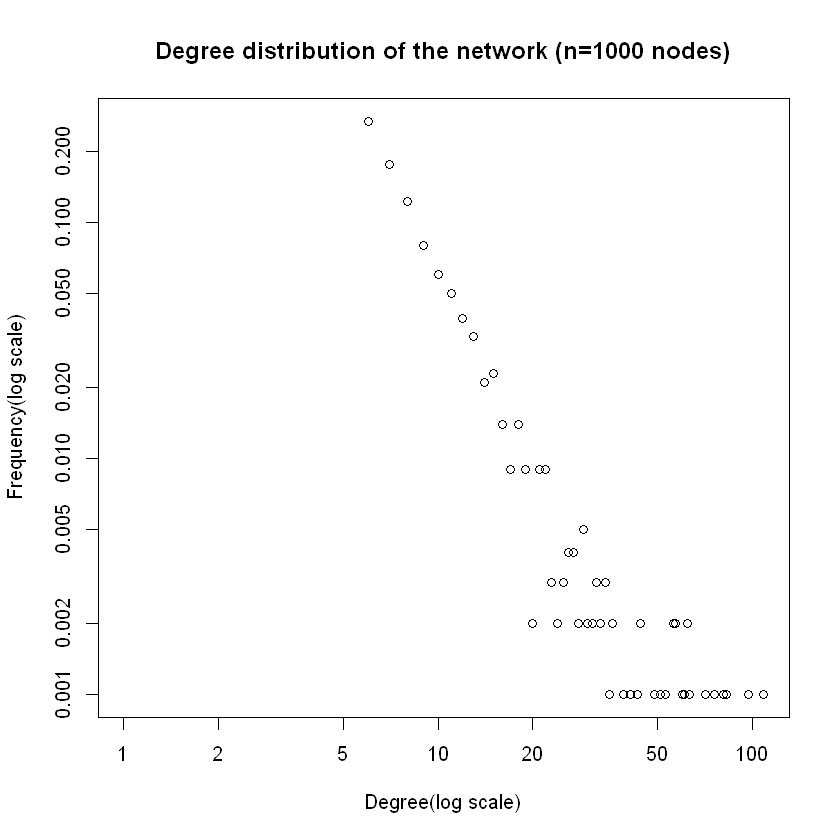

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"18 x values <= 0 omitted from logarithmic plot"

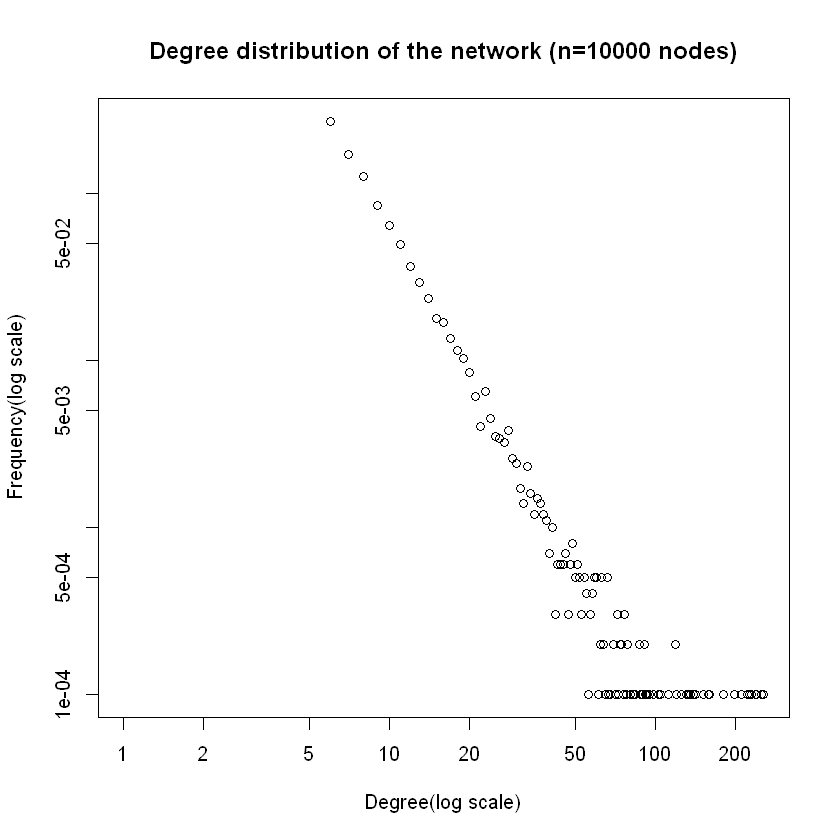

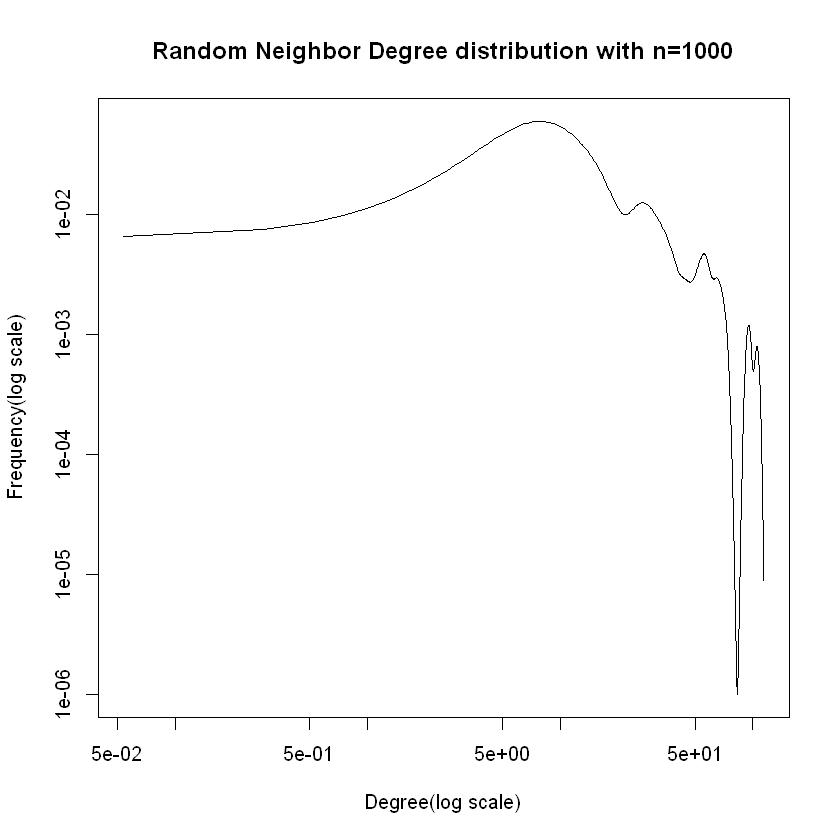

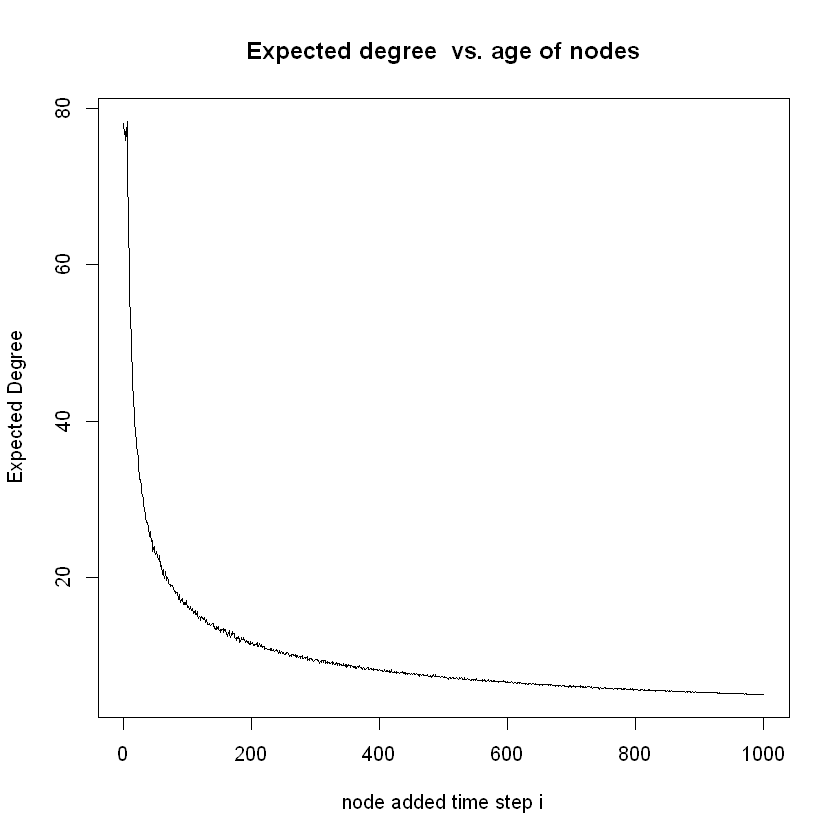

In [25]:
#m=5
g1<- barabasi.game(1000,m=5, directed=F)
is.connected(g1)
fg1 <- fastgreedy.community(g1)
G_modularity1 <- modularity(fg1)
print(paste("With n=1000 nodes, modularity is",G_modularity1))

#c)
g2<- barabasi.game(10000,m=5, directed=F)
is.connected(g2)
fg2 <- fastgreedy.community(g2)
G_modularity2 <- modularity(fg2)
print(paste("With n=10000 nodes, modularity is",G_modularity2))

plot(degree.distribution(g1),main="Degree distribution of the network (n=1000 nodes)",xlab="Degree(log scale)",ylab="Frequency(log scale)",log="xy")

plot(degree.distribution(g2),main="Degree distribution of the network (n=10000 nodes)",xlab="Degree(log scale)",ylab="Frequency(log scale)",log="xy")

g<- barabasi.game(1000,m=5, directed=F)
Degree<-NULL
for (n in 1:1000){
    i<-sample(1:vcount(g),1)
    neighbor<-neighbors(g,i)
    if(length(neighbor)==1){
        j<-neighbor
    }else{
        j<-sample(neighbor,1)
    }
    Degree<-c(Degree,degree(g,j))
}

plot(density(Degree), main='Random Neighbor Degree distribution with n=1000',xlab="Degree(log scale)",ylab="Frequency(log scale)",log="xy")

degreelist<-numeric(0)
for( i in 1:1000){
    degreelist[i]<-0 }
for( n in 1:500){
    g<- barabasi.game(1000,m=5, directed=F)
    for (i in 1:1000){
        degreelist[i]<-degreelist[i]+degree(g,i)}
}
F_degree<-degreelist/500

plot(seq(1,1000, 1),F_degree,type='l',main="Expected degree  vs. age of nodes",xlab="node added time step i",ylab="Expected Degree")

In [26]:
g1<- barabasi.game(1000,m=1, directed=F)

In [27]:
g2<-degree.sequence.game(degree(g1),method="simple.no.multiple")

In [28]:
is.connected(g1)
fg1 <- fastgreedy.community(g1)
G_modularity1 <- modularity(fg1)
print(paste(" preferential attachment network , modularity is",G_modularity1))

[1] TRUE

[1] " preferential attachment network , modularity is 0.932646360073789"


In [29]:
is.connected(g2)
fg2 <- fastgreedy.community(g2)
G_modularity2 <- modularity(fg2)
print(paste(" preferential attachment network , modularity is",G_modularity2))

[1] FALSE

[1] " preferential attachment network , modularity is 0.836178019861707"


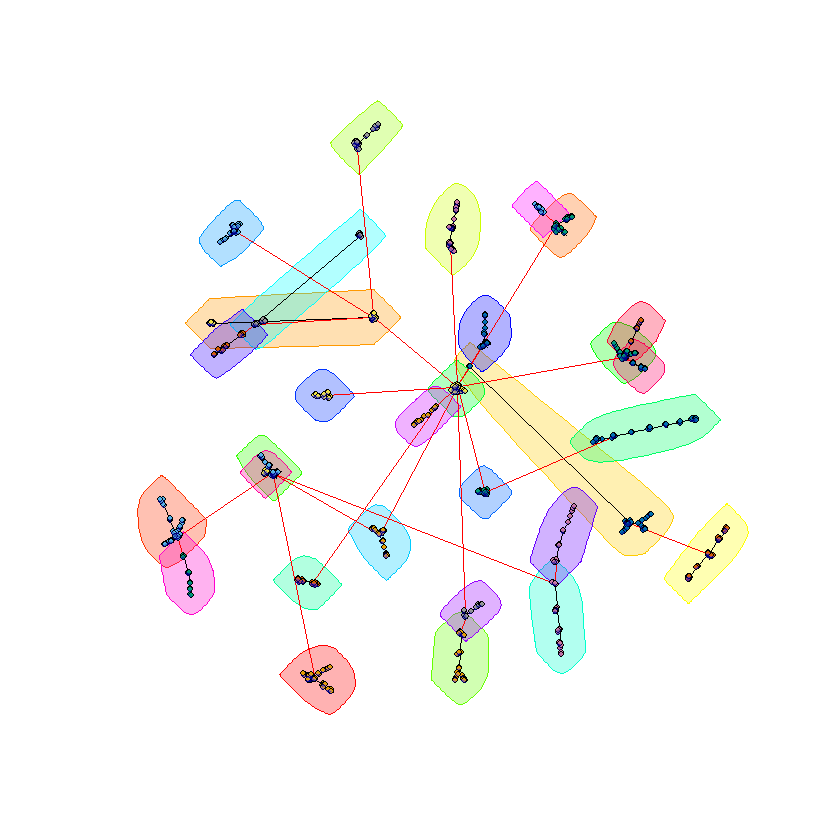

In [30]:
plot(fg1,g1,vertex.size=2, vertex.label.cex=0.01)

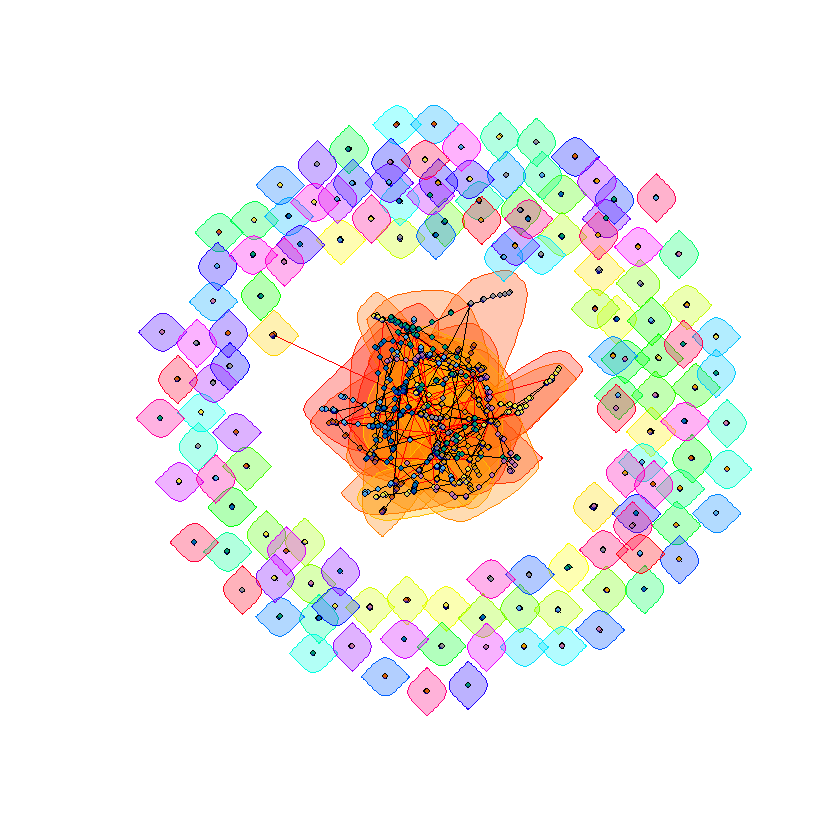

In [31]:
plot(fg2,g2,vertex.size=2, vertex.label.cex=0.01)